In [ ]:
# Import Dependencies
import numpy as np
import pandas as pd
import sklearn
import os 

In [61]:
data_dir = 'data_reviews'
x_train_df = pd.read_csv(os.path.join(data_dir, 'x_train.csv'))
y_train_df = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))

tr_text_list = x_train_df['text'].values.tolist()

# Flatten y_train to (n,) in order to supress scikit-learn warnings
y_train_flat = y_train_df.values.ravel()
print(y_train_flat.shape)

(2400,)


<font size="10">Preprocessing steps</font>

In [2]:
# !pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.8 MB/s eta 0:00:00a 0:00:01m
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/8f/3e/4b8b40eb3c80aeaf360f0361d956d129bb3d23b2a3ecbe3a04a8f3bdd6d3/regex-2023.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.8 MB/s eta 0:00:00
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.9/773.9 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [39]:
# Import Dependencies
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/joseph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/joseph/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
def preprocess_basic(sentences):
    ''' Basic Preprocessing Tokenizer that only removes punctuations and uppercases'''
    preprocessed_sentences = []

    for sentence in sentences:
        # Tokenize the sentence
        tokens = word_tokenize(sentence)

        # Remove punctuations
        filtered_tokens = [word.lower() for word in tokens if word.isalpha()]

        # Join the tokens back into a single string
        preprocessed_sentence = ' '.join(filtered_tokens)
        preprocessed_sentences.append(preprocessed_sentence)

    return preprocessed_sentences

In [42]:
def preprocess_stopwords(sentences):
    '''Basic Preprocessing Tokenizer that aslo removes stopwords'''
    preprocessed_sentences = []
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    for sentence in sentences:
        # Tokenize the sentence
        tokens = word_tokenize(sentence)

        # Remove stopwords and punctuation
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha()]
        
        # Stemming (optional)
        # stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

        # Join the tokens back into a single string
        preprocessed_sentence = ' '.join(filtered_tokens)
        preprocessed_sentences.append(preprocessed_sentence)

    return preprocessed_sentences

<font size='10'>(Basic Preprocessing) Evaluate # Folds for CV</font>

In [57]:
# Import Dependencies
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [62]:
processed_reviews = preprocess_basic(tr_text_list)

In [63]:
# Create a Vectorizer Object
vectorizer = CountVectorizer()
 
vectorizer.fit(processed_reviews)
 
# Print the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)

# Encode the processed reviews
x_processed = vectorizer.transform(processed_reviews)
 
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(x_processed.toarray())

Vocabulary:  {'oh': 2572, 'and': 126, 'forgot': 1528, 'to': 3856, 'also': 103, 'mention': 2360, 'the': 3783, 'weird': 4196, 'color': 704, 'effect': 1208, 'it': 2013, 'has': 1735, 'on': 2586, 'your': 4313, 'phone': 2753, 'that': 3781, 'one': 2588, 'did': 1027, 'work': 4270, 'either': 1217, 'waste': 4162, 'of': 2564, 'bucks': 470, 'product': 2900, 'is': 2010, 'useless': 4061, 'since': 3406, 'does': 1093, 'not': 2535, 'have': 1740, 'enough': 1261, 'charging': 613, 'current': 903, 'charge': 608, 'cellphones': 584, 'was': 4159, 'planning': 2781, 'use': 4057, 'with': 4249, 'none': 2525, 'three': 3819, 'sizes': 3421, 'they': 3799, 'sent': 3310, 'headset': 1751, 'would': 4285, 'stay': 3571, 'in': 1912, 'my': 2470, 'ears': 1184, 'worst': 4280, 'customer': 908, 'service': 3326, 'ngage': 2510, 'still': 3593, 'lacking': 2107, 'earbuds': 1175, 'always': 106, 'cuts': 915, 'out': 2622, 'makes': 2284, 'beep': 324, 'sound': 3502, 'then': 3794, 'says': 3238, 'signal': 3391, 'failed': 1373, 'only': 2592,

<font size="5">Split training set into training and validation set</font>

In [66]:
x_train_processed, x_val_processed, y_train, y_val = train_test_split(x_processed, y_train_flat, test_size=0.2, random_state=42)
print(f'x_train shape = {x_train_processed.shape}')
print(f'y_train shape = {y_train.shape}')
print(f'x_val shape = {x_val_processed.shape}')
print(f'y_val shape = {y_val.shape}')

x_train shape = (1920, 4325)
y_train shape = (1920,)
x_val shape = (480, 4325)
y_val shape = (480,)


In [67]:
# Create Logistic Regression model
model = LogisticRegression()

# Define scoring function based on scikitlearn cross_val_score
def kfold_scores(model, x_tr, y_tr, cv=3, scoring='accuracy'):
    scores = cross_val_score(model, x_tr, y_tr, cv=cv, scoring=scoring)

    # Print the accuracy scores for each fold
    print(f'For Folds = {cv}')
    for i, score in enumerate(scores):
        print(f'Fold {i+1} - ROC_AUC score: {score:.2f}')
        
    # Calculate and print the mean accuracy and standard deviation
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    print(f'Mean ROC_AUC score: {mean_accuracy:.2f} \nStandard Deviation: {std_accuracy:.2f}')

In [68]:
scores_k03 = kfold_scores(model, x_train_processed, y_train, cv=3, scoring='roc_auc')

For Folds = 3
Fold 1 - ROC_AUC score: 0.86
Fold 2 - ROC_AUC score: 0.84
Fold 3 - ROC_AUC score: 0.88
Mean ROC_AUC score: 0.86 
Standard Deviation: 0.01


In [69]:
scores_k05 = kfold_scores(model, x_train_processed, y_train, cv=5, scoring='roc_auc')

For Folds = 5
Fold 1 - ROC_AUC score: 0.88
Fold 2 - ROC_AUC score: 0.85
Fold 3 - ROC_AUC score: 0.84
Fold 4 - ROC_AUC score: 0.87
Fold 5 - ROC_AUC score: 0.89
Mean ROC_AUC score: 0.87 
Standard Deviation: 0.02


In [70]:
scores_k10 = kfold_scores(model, x_train_processed, y_train, cv=10, scoring='roc_auc')

For Folds = 10
Fold 1 - ROC_AUC score: 0.88
Fold 2 - ROC_AUC score: 0.88
Fold 3 - ROC_AUC score: 0.83
Fold 4 - ROC_AUC score: 0.88
Fold 5 - ROC_AUC score: 0.85
Fold 6 - ROC_AUC score: 0.84
Fold 7 - ROC_AUC score: 0.90
Fold 8 - ROC_AUC score: 0.84
Fold 9 - ROC_AUC score: 0.91
Fold 10 - ROC_AUC score: 0.90
Mean ROC_AUC score: 0.87 
Standard Deviation: 0.03


In [71]:
scores_k15 = kfold_scores(model, x_train_processed, y_train, cv=15, scoring='roc_auc')

For Folds = 15
Fold 1 - ROC_AUC score: 0.89
Fold 2 - ROC_AUC score: 0.91
Fold 3 - ROC_AUC score: 0.85
Fold 4 - ROC_AUC score: 0.84
Fold 5 - ROC_AUC score: 0.88
Fold 6 - ROC_AUC score: 0.86
Fold 7 - ROC_AUC score: 0.88
Fold 8 - ROC_AUC score: 0.82
Fold 9 - ROC_AUC score: 0.86
Fold 10 - ROC_AUC score: 0.87
Fold 11 - ROC_AUC score: 0.90
Fold 12 - ROC_AUC score: 0.86
Fold 13 - ROC_AUC score: 0.91
Fold 14 - ROC_AUC score: 0.92
Fold 15 - ROC_AUC score: 0.88
Mean ROC_AUC score: 0.87 
Standard Deviation: 0.03


k = 5 seems sufficient (highest score, lowest std dev.)

<font size='10'>(Basic Preprocessing) Hyperparameter Selection with CV</font>

For now will use only easily available hyperparameter for sklearn's LogistRegression classifier:
- solver
- regularization/penalty
- c parameter

In [99]:
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay

In [94]:
model = LogisticRegression(max_iter=200)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l1', 'l2', 'elasticnet']
penalty = ['l2'] # use l2 only since it's the only penalty supported by all 3 solvers
c_values = np.logspace(-5, 5, num=11)

grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
           

In [95]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, n_jobs=-1, scoring='roc_auc')
grid_result = grid_search.fit(x_train_processed, y_train)

In [96]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.866863 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.724480 (0.019752) with: {'C': 1e-05, 'penalty': 'l2', 'solver': 'newton-cg'}
0.724388 (0.020013) with: {'C': 1e-05, 'penalty': 'l2', 'solver': 'lbfgs'}
0.724659 (0.021137) with: {'C': 1e-05, 'penalty': 'l2', 'solver': 'liblinear'}
0.725137 (0.020066) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.725137 (0.020052) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.725489 (0.020805) with: {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}
0.733244 (0.019355) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}
0.733260 (0.019327) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
0.733868 (0.020541) with: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.773424 (0.016454) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.773424 (0.016467) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.773624 (0.016900) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


Choosing Best Parameters as statedt by the GridSearch results: C = 1.0, solver = lbfgs

Now test with validation set

In [100]:
chosen_penalty = 'l2'
chosen_solver = 'lbfgs'
chosen_c_value = 1.0

In [102]:
chosen_model = LogisticRegression(penalty=chosen_penalty, solver=chosen_solver, C=chosen_c_value)
chosen_model.fit(x_train_processed, y_train)
yhat_val = chosen_model.predict(x_val_processed)

In [104]:
display(yhat_val)

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [105]:
display(y_val)

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

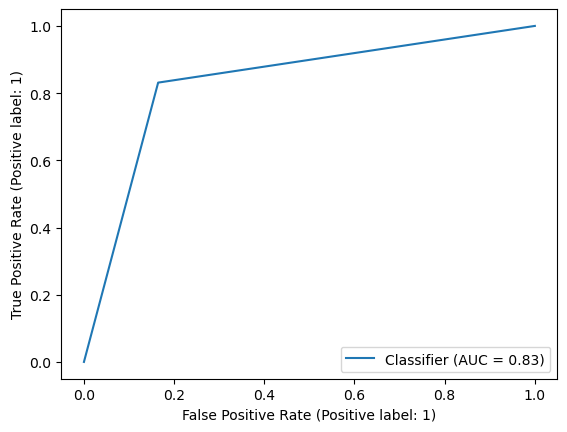

In [103]:
RocCurveDisplay.from_predictions(y_val, yhat_val)
plt.show()